In [1]:
# %% [code]
# ## Cell 1: Setup and Imports
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

# Adjust the path so that our custom modules can be imported.
# (Assuming the notebook is in the project root or experiments folder.)
# project_root = os.path.join(os.path.dirname(__file__), '..')
# if project_root not in sys.path:
    # sys.path.append(project_root)

# Import custom modules from our project.
from data.synthetic_data import generate_synthetic_data, plot_lasso_evolution
from methods.lasso_cd import lasso_coordinate_descent
from methods.lasso_fista import lasso_fista
from methods.lasso_ista import lasso_ista
from methods.square_root_lasso import square_root_lasso


# Set a nice plotting style.
# sns.set(style="whitegrid")
print("Setup complete.")

import numpy as np
# np.__config__.show()
# np.__version__

Setup complete.


In [2]:
n_samples = 100
n_features = 1000
n_informative = 20
noise = 0.1  # low noise level
random_state = 42

X_data, y_data, true_coef = generate_synthetic_data(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    noise=noise,
    random_state=random_state
)

print("Dataset shapes:")
print("  X_data:", X_data.shape)
print("  y_data:", y_data.shape)

# Display true informative features.
true_informative_indices = np.where(true_coef != 0)[0]
print("True informative feature indices:", true_informative_indices)
print("Number of true informative features:", len(true_informative_indices))

def standardize_data(X, y):
    """Standardize X (feature-wise) and center y."""
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_scaled = (X - X_mean) / X_std
    y_centered = y - np.mean(y)
    return X_scaled, y_centered

X_scaled, y_centered = standardize_data(X_data, y_data)
print("Data standardization complete.")

Dataset shapes:
  X_data: (100, 1000)
  y_data: (100,)
True informative feature indices: [119 150 180 205 287 299 424 438 574 700 710 731 778 782 793 800 856 882
 898 983]
Number of true informative features: 20
Data standardization complete.


In [3]:
lam = 0.1  # Regularization strength
beta_est, beta_history = lasso_coordinate_descent(X_scaled, y_centered, lam, max_iter=5000, tol=1e-4)

beta_history_arr = np.array(beta_history)  # shape: (iterations, n_features)
beta_matrix = beta_history_arr.T  # shape: (n_features, iterations)


selected_indices = np.where(beta_est > 1e-2)[0]
print("Number of features selected (nonzero coefficients):", len(selected_indices))
print("Indices of selected features:", selected_indices)

# Compare with ground truth informative features.
common_features = set(selected_indices).intersection(set(true_informative_indices))
fraction = len(common_features) / len(true_informative_indices) if len(true_informative_indices) > 0 else 0
print("Recovered informative features (intersection):", sorted(common_features))
print("Fraction of ground truth features recovered: {}/{} = {:.2f}".format(
    len(common_features), len(true_informative_indices), fraction))

Converged at iteration 2197
Number of features selected (nonzero coefficients): 34
Indices of selected features: [ 45 119 150 180 205 245 287 291 299 335 424 438 469 487 544 574 588 700
 710 718 731 778 782 793 800 837 856 882 898 925 933 943 983 997]
Recovered informative features (intersection): [np.int64(119), np.int64(150), np.int64(180), np.int64(205), np.int64(287), np.int64(299), np.int64(424), np.int64(438), np.int64(574), np.int64(700), np.int64(710), np.int64(731), np.int64(778), np.int64(782), np.int64(793), np.int64(800), np.int64(856), np.int64(882), np.int64(898), np.int64(983)]
Fraction of ground truth features recovered: 20/20 = 1.00


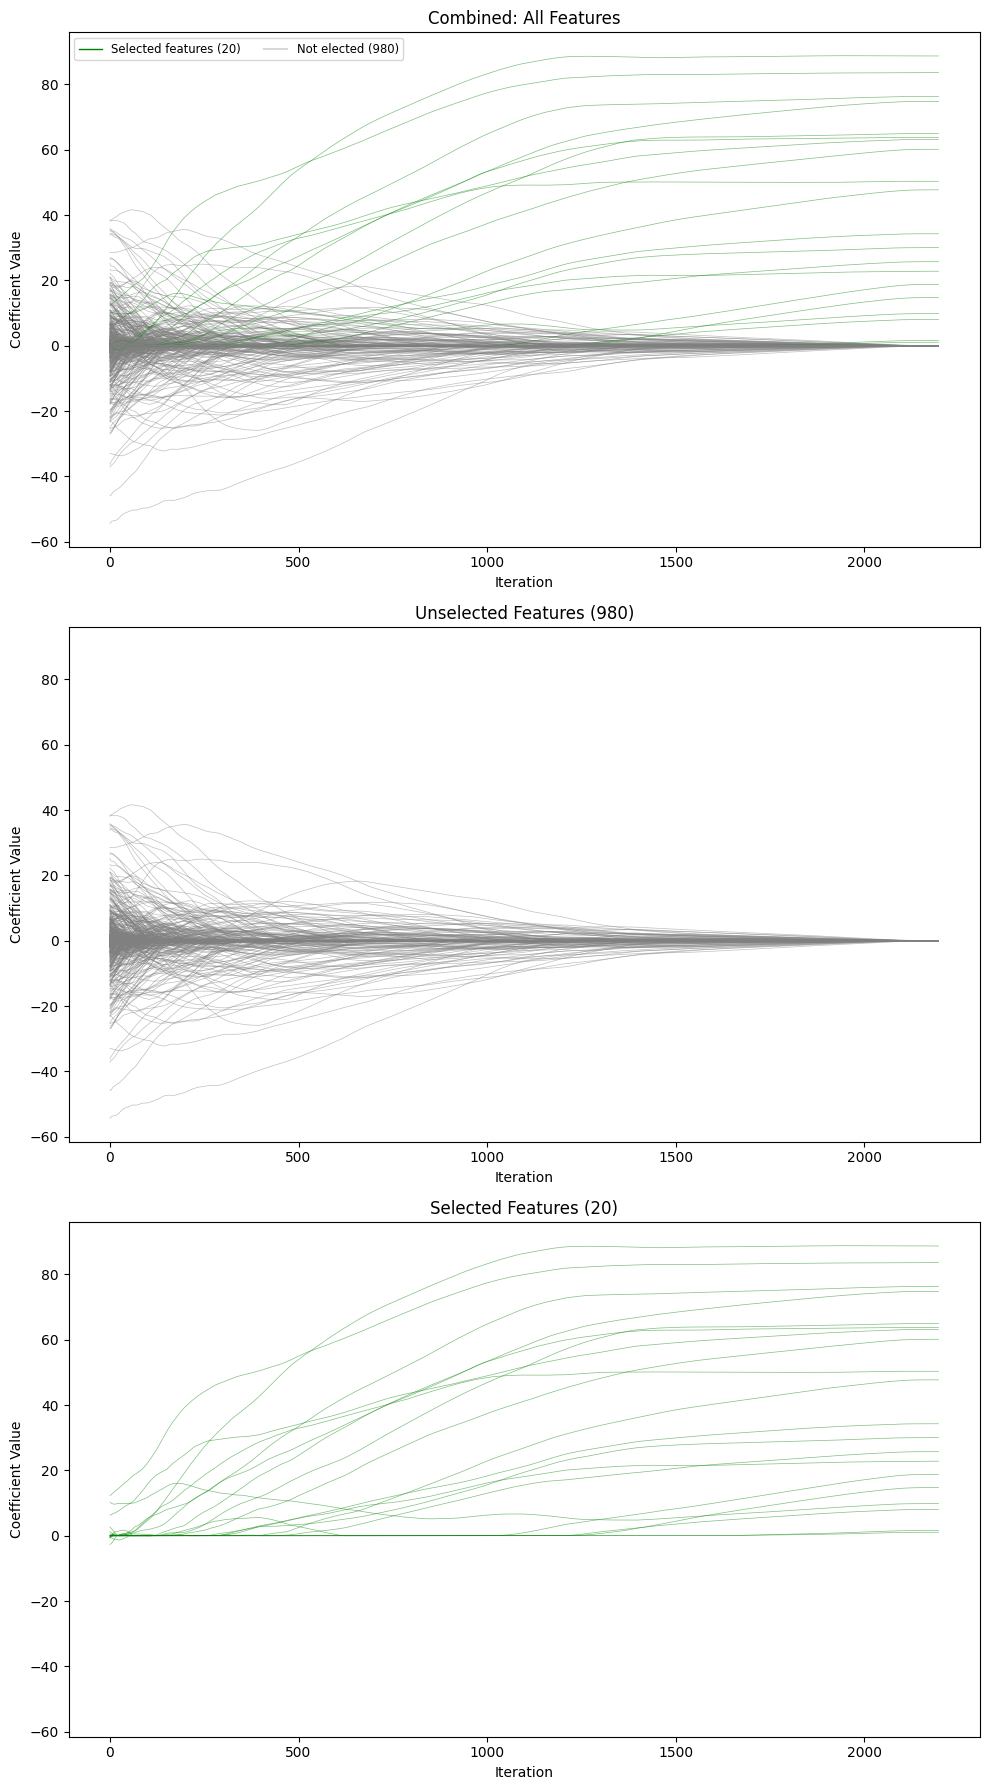

Number of features selected (nonzero coefficients): 20
Indices of selected features: [119 150 180 205 287 299 424 438 574 700 710 731 778 782 793 800 856 882
 898 983]
Recovered informative features (intersection): [np.int64(119), np.int64(150), np.int64(180), np.int64(205), np.int64(287), np.int64(299), np.int64(424), np.int64(438), np.int64(574), np.int64(700), np.int64(710), np.int64(731), np.int64(778), np.int64(782), np.int64(793), np.int64(800), np.int64(856), np.int64(882), np.int64(898), np.int64(983)]
Fraction of ground truth features recovered: 20/20 = 1.00


In [4]:
plot_lasso_evolution(beta_est, beta_history_arr, true_informative_indices, X_scaled, threshold=1e-1)

In [6]:
lam = 0.1  # Regularization strength
beta_est, beta_history = lasso_fista(X_scaled, y_centered, lam, max_iter=5000, tol=1e-4)

beta_history_arr = np.array(beta_history)  # shape: (iterations, n_features)
beta_matrix = beta_history_arr.T  # shape: (n_features, iterations)


selected_indices = np.where(beta_est > 0.1)[0]
print("Number of features selected (nonzero coefficients):", len(selected_indices))
print("Indices of selected features:", selected_indices)

# Compare with ground truth informative features.
common_features = set(selected_indices).intersection(set(true_informative_indices))
fraction = len(common_features) / len(true_informative_indices) if len(true_informative_indices) > 0 else 0
print("Recovered informative features (intersection):", sorted(common_features))
print("Fraction of ground truth features recovered: {}/{} = {:.2f}".format(
    len(common_features), len(true_informative_indices), fraction))

FISTA converged at iteration 2171
Number of features selected (nonzero coefficients): 20
Indices of selected features: [119 150 180 205 287 299 424 438 574 700 710 731 778 782 793 800 856 882
 898 983]
Recovered informative features (intersection): [np.int64(119), np.int64(150), np.int64(180), np.int64(205), np.int64(287), np.int64(299), np.int64(424), np.int64(438), np.int64(574), np.int64(700), np.int64(710), np.int64(731), np.int64(778), np.int64(782), np.int64(793), np.int64(800), np.int64(856), np.int64(882), np.int64(898), np.int64(983)]
Fraction of ground truth features recovered: 20/20 = 1.00


In [8]:
# plot_lasso_evolution(beta_est, beta_history_arr, true_informative_indices, X_scaled, threshold=1e-1)

In [15]:
lam = 0.1  # Regularization strength
beta_est, beta_history = lasso_ista(X_scaled, y_centered, lam, max_iter=100000, tol=1e-4)

beta_history_arr = np.array(beta_history)  # shape: (iterations, n_features)
beta_matrix = beta_history_arr.T  # shape: (n_features, iterations)


selected_indices = np.where(beta_est > 0.1)[0]
print("Number of features selected (nonzero coefficients):", len(selected_indices))
print("Indices of selected features:", selected_indices)

# Compare with ground truth informative features.
common_features = set(selected_indices).intersection(set(true_informative_indices))
fraction = len(common_features) / len(true_informative_indices) if len(true_informative_indices) > 0 else 0
print("Recovered informative features (intersection):", sorted(common_features))
print("Fraction of ground truth features recovered: {}/{} = {:.2f}".format(
    len(common_features), len(true_informative_indices), fraction))

ISTA converged at iteration 60171
Number of features selected (nonzero coefficients): 20
Indices of selected features: [119 150 180 205 287 299 424 438 574 700 710 731 778 782 793 800 856 882
 898 983]
Recovered informative features (intersection): [np.int64(119), np.int64(150), np.int64(180), np.int64(205), np.int64(287), np.int64(299), np.int64(424), np.int64(438), np.int64(574), np.int64(700), np.int64(710), np.int64(731), np.int64(778), np.int64(782), np.int64(793), np.int64(800), np.int64(856), np.int64(882), np.int64(898), np.int64(983)]
Fraction of ground truth features recovered: 20/20 = 1.00


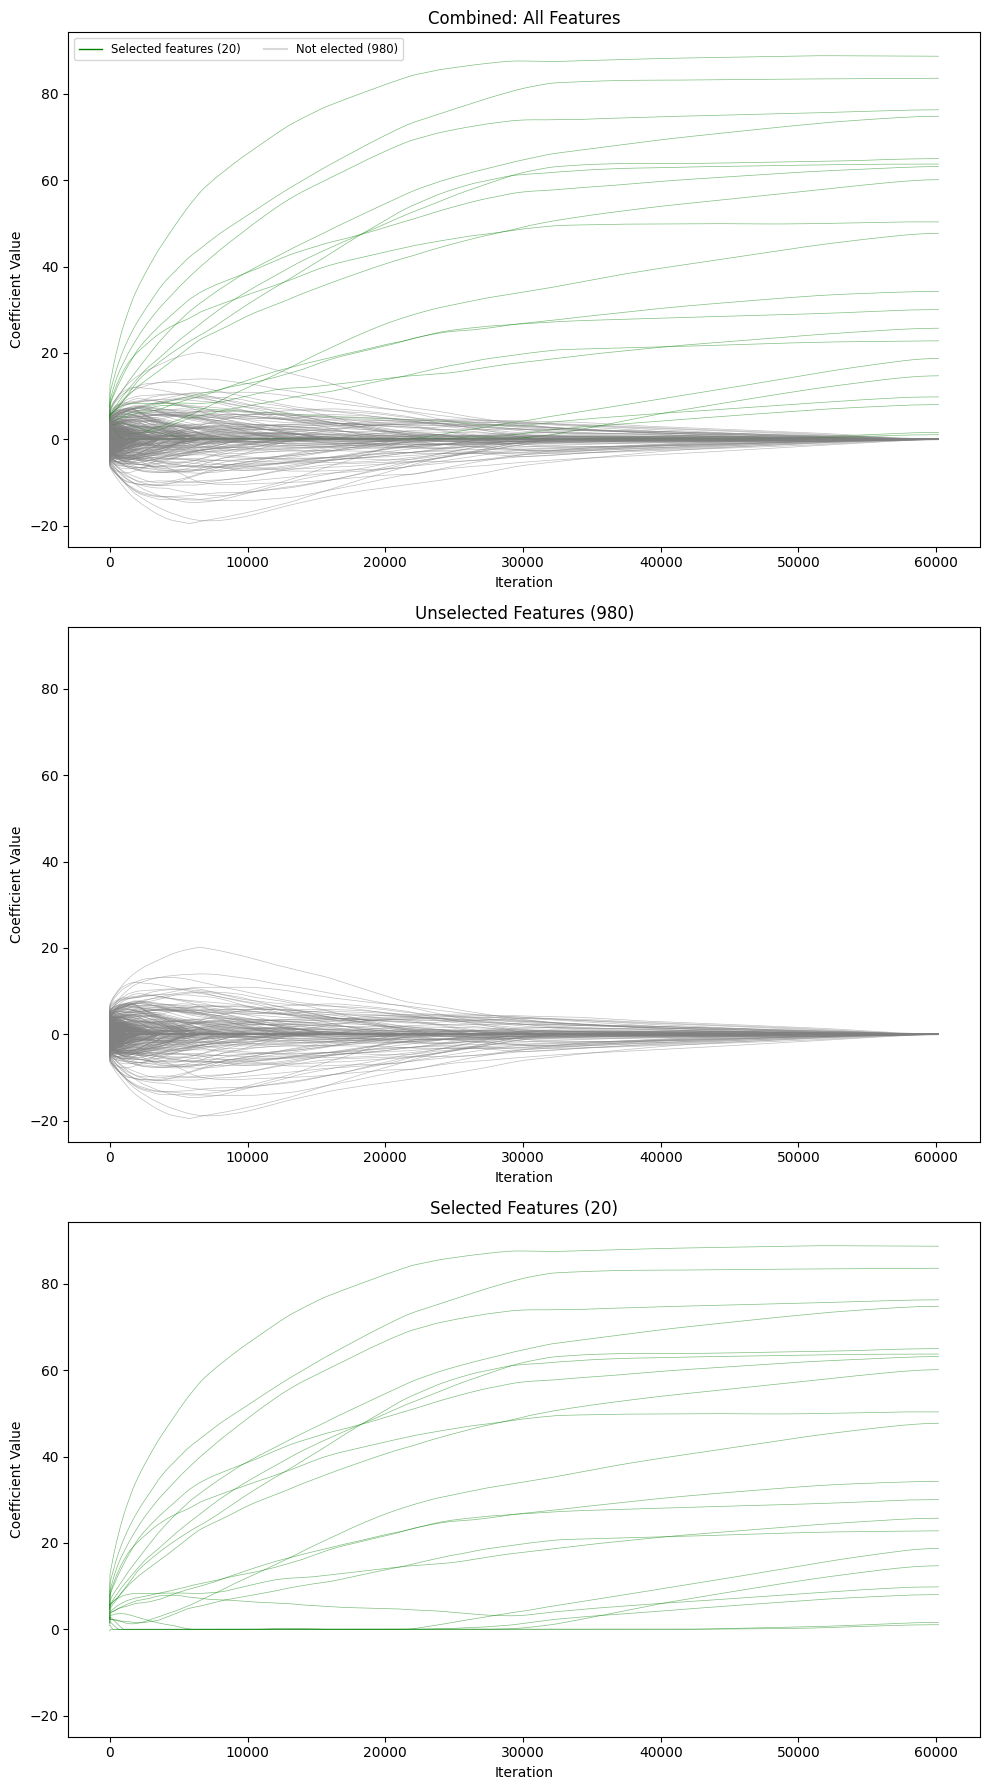

Number of features selected (nonzero coefficients): 20
Indices of selected features: [119 150 180 205 287 299 424 438 574 700 710 731 778 782 793 800 856 882
 898 983]
Recovered informative features (intersection): [np.int64(119), np.int64(150), np.int64(180), np.int64(205), np.int64(287), np.int64(299), np.int64(424), np.int64(438), np.int64(574), np.int64(700), np.int64(710), np.int64(731), np.int64(778), np.int64(782), np.int64(793), np.int64(800), np.int64(856), np.int64(882), np.int64(898), np.int64(983)]
Fraction of ground truth features recovered: 20/20 = 1.00


In [16]:
plot_lasso_evolution(beta_est, beta_history_arr, true_informative_indices, X_scaled, threshold=1e-1)

In [14]:
# %% [code]
tau = 0.2  # Regularization parameter for square-root LASSO
beta_est, sigma_est, beta_history = square_root_lasso(X_scaled, y_centered, tau, max_outer_iter=250, tol=1e-4)

# Extract only the beta vectors from the history.
beta_history_arr = np.array([b for sigma, b in beta_history])  # shape: (outer iterations, n_features)
beta_matrix = beta_history_arr.T  # shape: (n_features, outer iterations)


selected_indices = np.where(beta_est != 0)[0]
print("Number of features selected (nonzero coefficients):", len(selected_indices))
print("Indices of selected features:", selected_indices)

# Compare with ground truth informative features.
common_features = set(selected_indices).intersection(set(true_informative_indices))
fraction = len(common_features) / len(true_informative_indices) if len(true_informative_indices) > 0 else 0
print("Recovered informative features (intersection):", sorted(common_features))
print("Fraction of ground truth features recovered: {}/{} = {:.2f}".format(
    len(common_features), len(true_informative_indices), fraction))


FISTA converged at iteration 498
FISTA converged at iteration 622
FISTA converged at iteration 795
FISTA converged at iteration 876
FISTA converged at iteration 1051
FISTA converged at iteration 1107
FISTA converged at iteration 1222
FISTA converged at iteration 1382
FISTA converged at iteration 1653
FISTA converged at iteration 2381
FISTA converged at iteration 2648
FISTA converged at iteration 2546
FISTA converged at iteration 2500
FISTA converged at iteration 2394
FISTA converged at iteration 2115
FISTA converged at iteration 2306
FISTA converged at iteration 2255
FISTA converged at iteration 2780
FISTA converged at iteration 3152
FISTA converged at iteration 2627
FISTA converged at iteration 1877
FISTA converged at iteration 2299
FISTA converged at iteration 3808
FISTA converged at iteration 2824
FISTA converged at iteration 2395
FISTA converged at iteration 2712
FISTA converged at iteration 2784
FISTA converged at iteration 2524
FISTA converged at iteration 2441
FISTA converged at

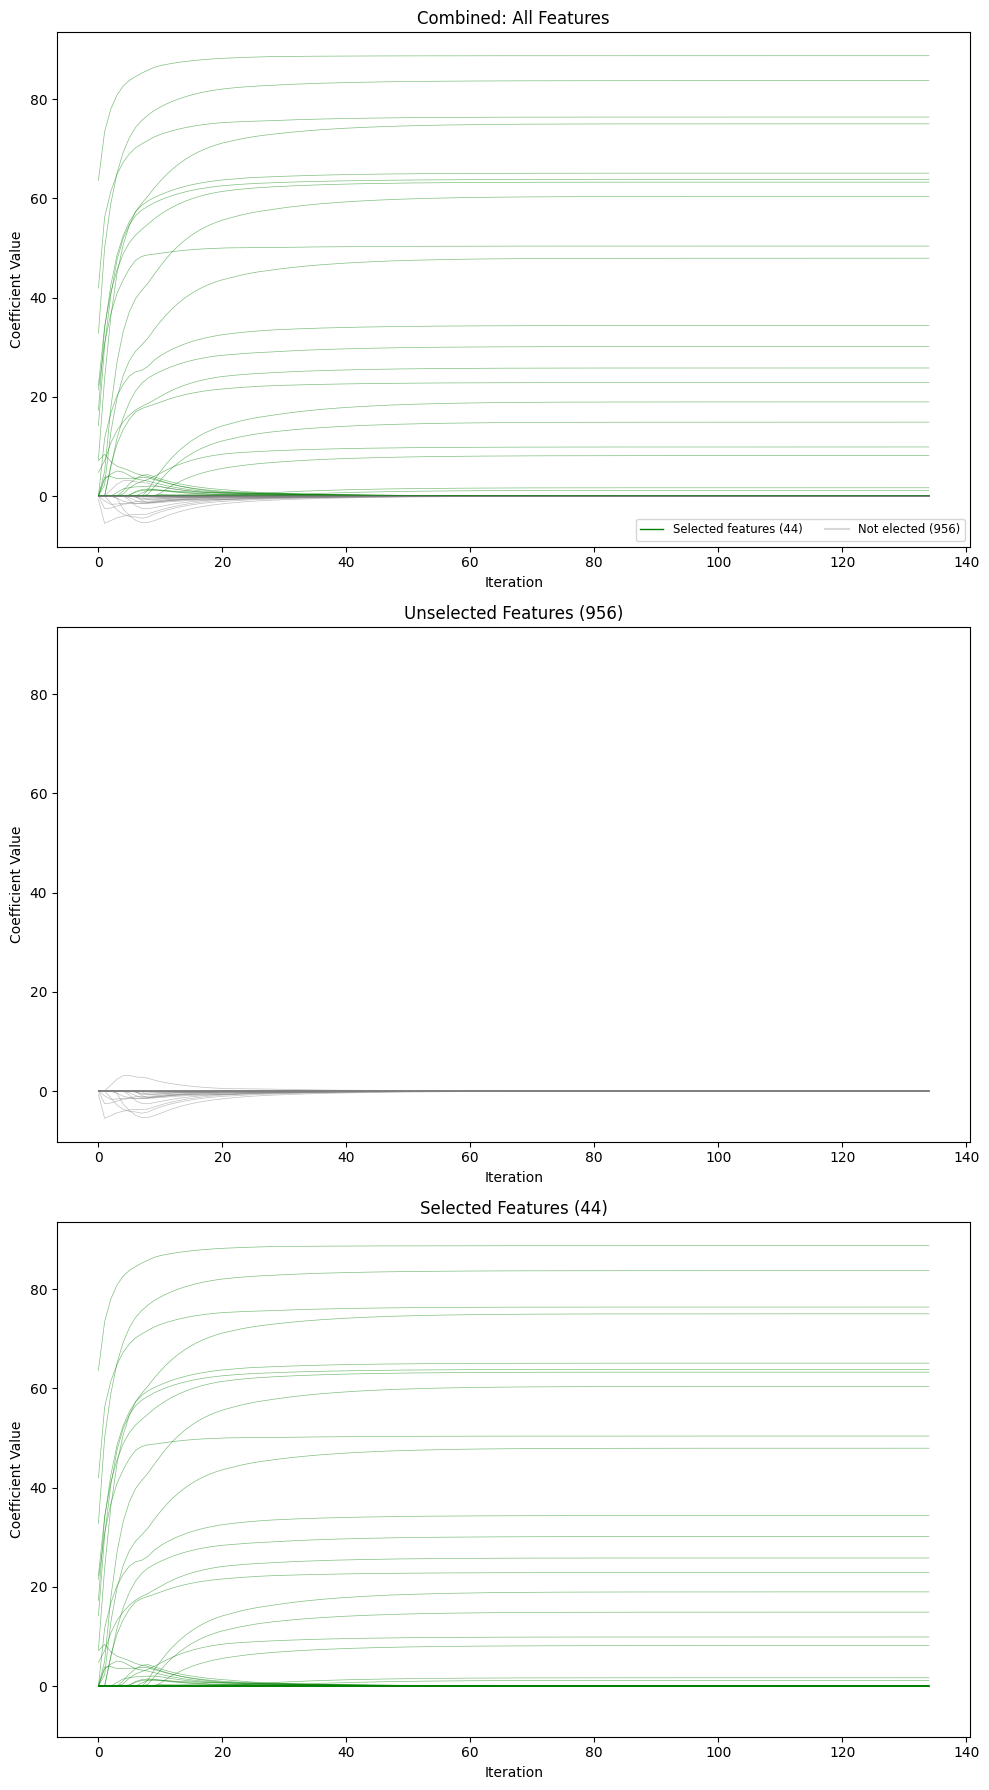

Number of features selected (nonzero coefficients): 44
Indices of selected features: [ 45 119 150 180 188 205 245 267 269 287 291 299 341 372 413 424 438 449
 469 487 544 574 588 614 700 710 718 731 778 782 790 793 800 837 839 856
 882 898 925 929 934 943 983 997]
Recovered informative features (intersection): [np.int64(119), np.int64(150), np.int64(180), np.int64(205), np.int64(287), np.int64(299), np.int64(424), np.int64(438), np.int64(574), np.int64(700), np.int64(710), np.int64(731), np.int64(778), np.int64(782), np.int64(793), np.int64(800), np.int64(856), np.int64(882), np.int64(898), np.int64(983)]
Fraction of ground truth features recovered: 20/20 = 1.00


In [13]:
plot_lasso_evolution(beta_est, beta_history_arr, true_informative_indices, X_scaled, threshold=0)